In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
pd.options.display.float_format = '{:.2f}'.format
data_crops=pd.read_csv('apy.csv')
print(data_crops.head())
crops = data_crops.copy()
print(crops.head())

naval = crops.isnull().sum()

print(naval)

crops2 = crops.dropna(axis=0) # created a new dataframe data2
crops2.info()

                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut 1254.00     2000.00  
1  Other Kharif pulses    2.00        1.00  
2                 Rice  102.00      321.00  
3               Banana  176.00      641.00  
4            Cashewnut  720.00      165.00  
                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andama

In [3]:
crops2['Season']

0         Kharif     
1         Kharif     
2         Kharif     
3         Whole Year 
4         Whole Year 
             ...     
246086    Summer     
246087    Summer     
246088    Whole Year 
246089    Winter     
246090    Winter     
Name: Season, Length: 242361, dtype: object

C:\Users\Amit\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Season', ylabel='count'>

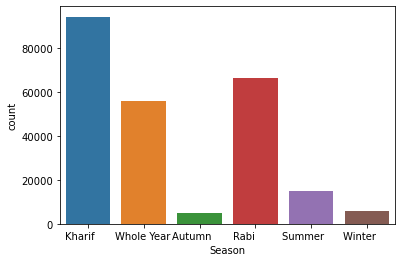

In [4]:
sns.countplot(crops2['Season'],data=crops2)

In [5]:
production = crops2.groupby(['Season'])['Production'].agg('sum')
production

Season
Autumn            64413768.22
Kharif          4029970242.70
Rabi            2051687553.08
Summer           170657925.03
Whole Year    134424837450.19
Winter           434549828.17
Name: Production, dtype: float64

In [25]:
pd.set_option('display.max_rows', None)
crops_season = pd.crosstab(index=crops['Crop'],columns=crops2['Season'])
crops_season

Season,Autumn,Kharif,Rabi,Summer,Whole Year,Winter
Crop,,,,,,
Apple,0,0,0,0,4,0
Arcanut (Processed),0,0,0,0,20,0
Arecanut,0,16,118,0,1404,0
Arhar/Tur,18,6701,444,28,254,31
Ash Gourd,0,0,0,0,44,0
Atcanut (Raw),0,0,0,0,20,0
Bajra,0,4630,262,331,156,0
Banana,6,131,60,190,2739,7
Barley,0,134,3934,0,48,0


In [26]:
high_prod = crops2.groupby(['District_Name'])['Production'].agg('sum').sort_values()
high_prod

District_Name
MUMBAI                               2.00
NAMSAI                             794.00
HYDERABAD                         3835.00
KHUNTI                            5024.00
RAMGARH                           5472.00
SHOPIAN                          15614.00
LONGDING                         20731.00
KARGIL                           26793.80
KISHTWAR                         35664.20
LEH LADAKH                       36461.50
LAWNGTLAI                        44406.00
GANDERBAL                        45524.30
RAMBAN                           47335.20
SAIHA                            52691.50
SERCHHIP                         60451.00
BANDIPORA                        62557.30
CHANDIGARH                       63956.50
WEST JAINTIA HILLS               69514.00
KINNAUR                          69751.00
SOUTH WEST KHASI HILLS           70250.00
KURUNG KUMEY                     79234.33
NORTH GARO HILLS                 79604.00
KULGAM                           84849.80
MAMIT               

In [27]:
#high_prod_tamilnadu = crops2.groupby(['Crop_Year'],['State_Name'])['Production'].agg('sum').sort_values()
high_prod_tamilnadu = crops2.groupby(['Crop_Year','State_Name']).agg({'Production': 'sum'})

print(high_prod_tamilnadu)

                                         Production
Crop_Year State_Name                               
1997      Andhra Pradesh                21093500.00
          Arunachal Pradesh               267148.00
          Assam                          5778334.00
          Bihar                         19031372.00
          Goa                              72538.00
          Gujarat                       27243227.00
          Haryana                       20009400.00
          Jammu and Kashmir               842858.00
          Karnataka                     42603496.00
          Kerala                         8976476.00
          Madhya Pradesh                17189800.00
          Maharashtra                   11641856.00
          Manipur                            412.00
          Meghalaya                       706814.00
          Mizoram                         150914.00
          Nagaland                        219580.00
          Odisha                         7909968.00
          Pu

In [28]:
#high_prod_state = crops2.groupby(['State_Name']).agg({'Production': 'sum'})

high_prod_state = crops2.groupby(['State_Name'])['Production'].agg('sum').sort_values()
high_prod_state

State_Name
Chandigarh                          63956.50
Mizoram                           1661539.83
Dadra and Nagar Haveli            1847871.00
Sikkim                            2435735.00
Manipur                           5230917.00
Arunachal Pradesh                 6823912.60
Jharkhand                        10777741.75
Meghalaya                        12112496.00
Tripura                          12522917.00
Nagaland                         12765950.00
Jammu and Kashmir                13291015.70
Himachal Pradesh                 17805168.60
Chhattisgarh                    100951908.01
Uttarakhand                     132177355.00
Odisha                          160904070.10
Rajasthan                       281320270.50
Telangana                       335147930.00
Bihar                           366483596.66
Haryana                         381273890.00
Puducherry                      384724502.00
Madhya Pradesh                  448840738.66
Goa                             505755757.58

In [29]:
column_1 = crops["Area"]
column_2 = crops["Production"]
correlation = column_1. corr(column_2) #calculate correlation between `column_1` and `column_2`
print(correlation)

0.040587479199339895


In [30]:
avg_prod = crops2['Production'].mean()
avg_prod

582503.442250981

In [31]:
std_prod = crops2['Production'].std()
std_prod

17065813.172410317

In [32]:
top3_1997 = crops2.groupby(['Crop_Year','Crop']).agg({'Production': 'sum'})

print(top3_1997)

                                        Production
Crop_Year Crop                                    
1997      Arecanut                       308584.00
          Arhar/Tur                     1693632.00
          Bajra                         7622765.00
          Banana                        8577683.00
          Barley                        1586845.00
          Black pepper                    57204.00
          Cardamom                         1701.00
          Cashewnut                       93512.00
          Castor seed                    784499.00
          Coconut                       6344142.00
          Coriander                       13169.00
          Cotton(lint)                 10443524.00
          Dry chillies                   618764.00
          Dry ginger                      69027.00
          Garlic                         146910.00
          Gram                          3540892.00
          Groundnut                     6749962.00
          Horse-gram           

In [33]:
column_1 = crops["Area"]
column_2 = crops["Crop_Year"]
correlation1 = column_1. corr(column_2) #calculate correlation between `column_1` and `column_2`
print(correlation1)

-0.026021527208407686


In [34]:
column_1 = crops["Production"]
column_2 = crops["Crop_Year"]
correlation2 = column_1. corr(column_2) #calculate correlation between `column_1` and `column_2`
print(correlation2)

0.006989301430174887


In [35]:
year_prod_highest = crops2.groupby(['Crop_Year'])['Production'].agg('sum').sort_values()
year_prod_highest

Crop_Year
2015       6935064.70
1997     851232906.00
1998    5825320640.40
2010    6307608525.37
1999    6434665985.10
2007    6879442338.58
2000    7449709127.10
2001    7465540840.27
2009    7660494024.81
2002    7696955162.64
2008    7717018402.16
2003    7917973504.73
2005    8043757329.74
2012    8171054746.03
2004    8189461694.86
2014    8664540631.11
2006    8681913123.78
2013   12903588632.88
2011   14308904087.13
Name: Production, dtype: float64

In [36]:
high_crop_state = crops2.groupby(['State_Name'])['Crop']
high_crop_state.value_counts()

State_Name                   Crop                     
Andaman and Nicobar Islands  Cashewnut                      18
                             Coconut                        18
                             Arecanut                       17
                             Dry ginger                     17
                             Rice                           17
                             Banana                         16
                             Sugarcane                      15
                             Black pepper                   14
                             Dry chillies                   13
                             Sweet potato                   11
                             Tapioca                         9
                             other oilseeds                  9
                             Turmeric                        8
                             Other Kharif pulses             4
                             Maize                           3


In [37]:
high_crop_prod_state = crops2.groupby(['State_Name','Crop'])['Production'].sum()
high_crop_prod_state

State_Name                   Crop                     
Andaman and Nicobar Islands  Arecanut                          48035.81
                             Arhar/Tur                           104.00
                             Banana                            97424.65
                             Black pepper                        724.50
                             Cashewnut                          1684.79
                             Coconut                       717790000.00
                             Dry chillies                       4018.30
                             Dry ginger                        12675.60
                             Groundnut                            14.40
                             Maize                               367.62
                             Moong(Green Gram)                   575.50
                             Other Kharif pulses                 649.00
                             Rice                             223006.06
         